In [3]:
import h5py
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import xarray as xr
import pickle

%matplotlib widget

In [3]:
point_sizes = {}

def download_data(cycle, datapath):
    for f in tqdm(os.listdir(os.path.join(datapath, cycle))[:2]):
        try:
            with h5py.File(os.path.join(datapath, cycle, f), 'r') as hdf:
                for group in list(hdf.keys())[:-1]:
                    if group not in point_sizes:
                        point_sizes[group] = hdf[group + '/' + list(hdf[group].keys())[0]].size
                    else:
                        point_sizes[group] += hdf[group + '/' + list(hdf[group].keys())[0]].size
        except:
            print("Could not open h5 file: ", str(os.path.join(datapath, cycle, f)))
                
    return point_sizes

In [4]:
ant_datapath = '/Volumes/ice1/ben/ATL06/tiles/Antarctic/006/'
ant_icesat2dir = os.listdir(ant_datapath)

for cycle in os.listdir(ant_datapath):
    try:
        points = download_data(cycle, ant_datapath)
    except:
        print("Something went wrong in Antarctic " + str(cycle) + " during data download.")
    try:
        with open("./" + str(cycle)+'antarctic.pickle', 'wb') as handle:
            pickle.dump(points, handle, protocol=pickle.HIGHEST_PROTOCOL)
    except:
        print("Something went wrong in Antarctic " + str(cycle) + " during data saving.")

100%|██████████| 2/2 [00:03<00:00,  1.68s/it]
0it [00:00, ?it/s]
100%|██████████| 2/2 [00:04<00:00,  2.40s/it]


# Antarctica

In [2]:
datapath = '/Volumes/ice1/ben/ATL06/tiles/Antarctic/006/'
icesat2dir = os.listdir(datapath)

In [11]:
pickle_path = './cycle_02antarctic.pickle'
with open(pickle_path, 'rb') as file:
    data = pickle.load(file)

In [20]:
xs_ant = []
ys_ant = []
sizes_ant = []

for n, s in data.items():
    if 'E_' in n:
        part = n.partition('E_')
        xs_ant.append(float(part[0]))
        ys_ant.append(float(part[2][:-1]))
    sizes_ant.append(s)
    
sizes_ant = np.array(sizes_ant)
xs_ant = np.array(xs_ant)
ys_ant = np.array(ys_ant)

sizes_ant = sizes_ant.astype('f')
sizes_ant[sizes_ant == 0] = np.nan

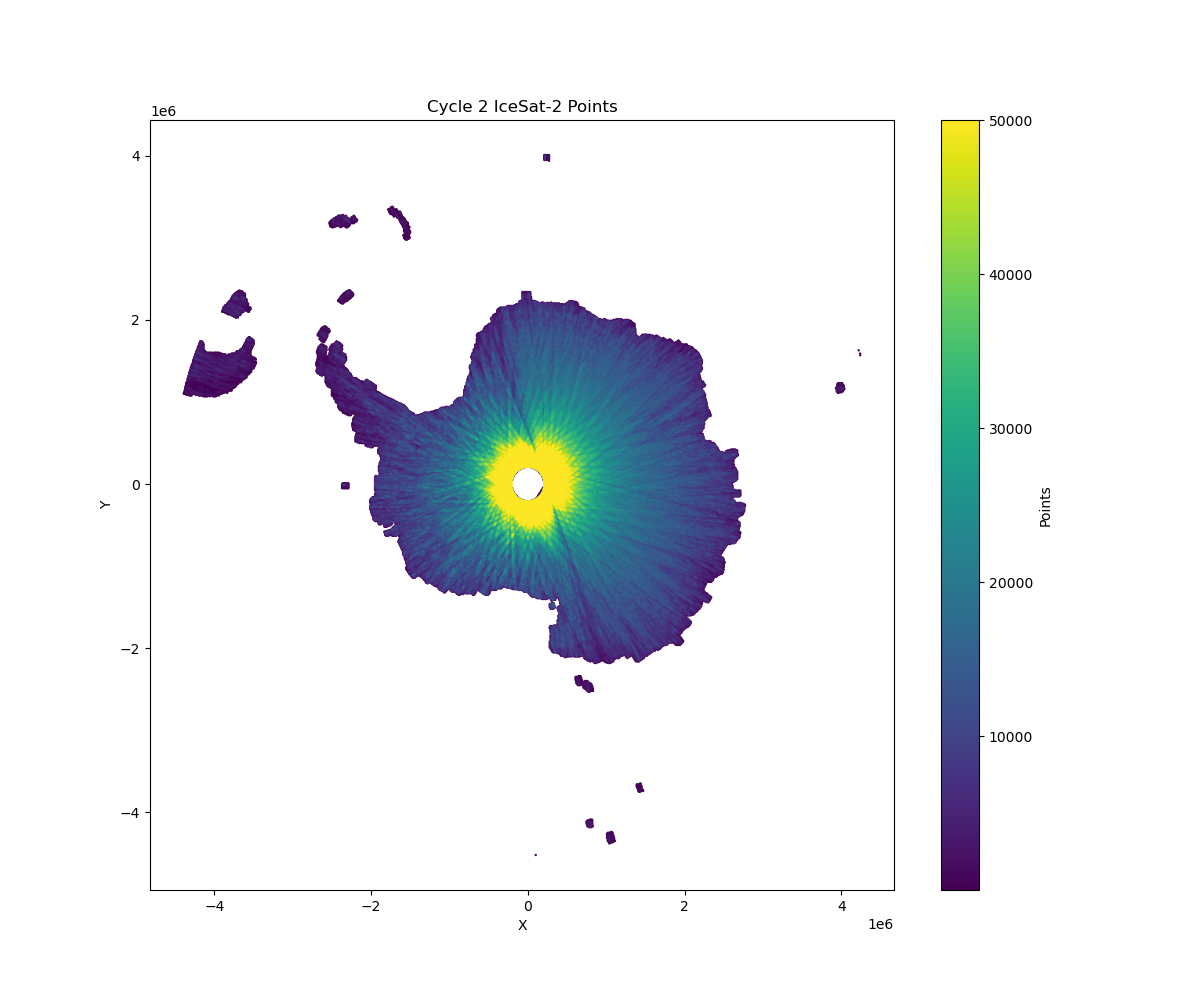

In [ ]:
fig1 = plt.figure(figsize=(12,10))
isort = np.argsort(sizes_ant)
plt.scatter(np.array(xs_ant)[isort], np.array(ys_ant)[isort], c=sizes_ant[isort], vmax=50000, cmap='viridis', s=.5)
plt.colorbar(label='Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Cycle 2 IceSat-2 Points")
plt.show()

plt.savefig('./cycle_02_antarctic_point_numbers.png', dpi=300)

### Iterate through files and grab group names and sizes

In [30]:
group_sizes = []
group_names = []
file_count = 0
group_count = 0

for cycle in icesat2dir[:1]:
    for f in tqdm(os.listdir(os.path.join(datapath, cycle))):
        # file_count += 1
        try:
            with h5py.File(os.path.join(datapath, cycle, f), 'r') as hdf:
                for group in list(hdf.keys())[:-1]:
                    group_names.append(group)
                    # group_count += 1
                    group_sizes.append(hdf[group + '/' + list(hdf[group].keys())[0]].size)
        except:
            print("Could not open h5 file: ", str(os.path.join(datapath, cycle, f)))

 84%|████████▍ | 1436/1708 [11:37<01:24,  3.22it/s]

Could not open h5 file:  /Volumes/ice1/ben/ATL06/tiles/Antarctic/006/cycle_01/tileglob_AA_01.log


100%|██████████| 1708/1708 [17:13<00:00,  1.65it/s]


In [31]:
np.save('./sizes.npy', group_sizes)
np.save('./groupnames.npy', group_names)

In [32]:
group_names = np.load('./groupnames.npy')
group_sizes = np.load('./sizes.npy')

In [33]:
xs = []
ys = []

for n in group_names:
    if 'E_' in n:
        part = n.partition('E_')
        xs.append(float(part[0]))
        ys.append(float(part[2][:-1]))

In [5]:
len(xs), len(ys), len(group_sizes)

(180030, 180030, 180030)

In [34]:
da = xr.DataArray(
    group_sizes,
    coords={'x': ('points', xs), 'y': ('points', ys)},
    dims=['points']
)

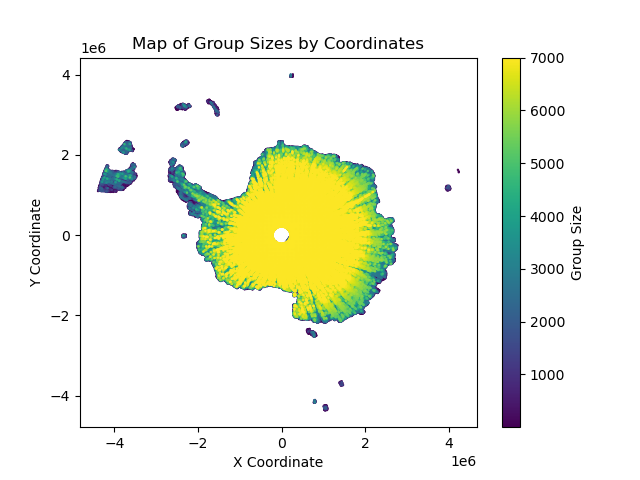

In [35]:
fig1 = plt.figure()
isort = np.argsort(group_sizes)
plt.scatter(np.array(xs)[isort], np.array(ys)[isort], c=group_sizes[isort], cmap='viridis', vmax=7000, s=.5)
plt.colorbar(label='Group Size')
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Map of Group Sizes by Coordinates")
plt.show()

In [23]:
type(isort[0])

numpy.int64

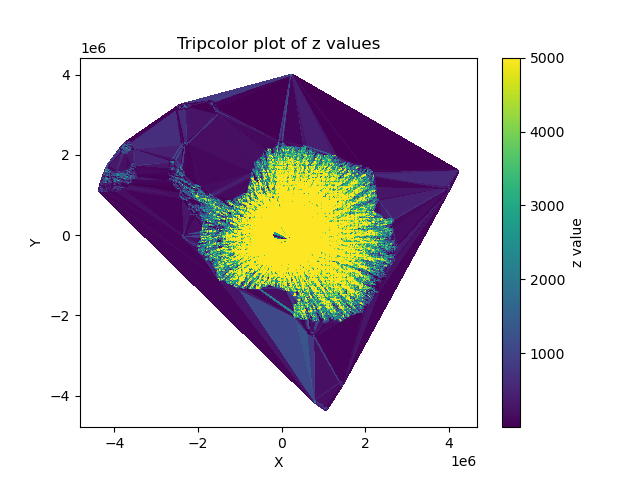

In [8]:
fig2 = plt.figure()
plt.tripcolor(xs, ys, group_sizes, shading="flat", cmap="viridis", vmax=5000, vmin=1)
plt.colorbar(label="z value")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Tripcolor plot of z values")
plt.show()

# Arctic

In [3]:
datapath_greenland = '/Volumes/ice1/ben/ATL06/tiles/Arctic/006/'
icesat2dir_greenland = os.listdir(datapath_greenland)

In [21]:
group_sizes_greenland = []
group_names_greenland = []
file_count = 0
group_count = 0

for cycle in icesat2dir_greenland[:1]:
    for f in tqdm(os.listdir(os.path.join(datapath_greenland, cycle))):
        # file_count += 1
        try:
            with h5py.File(os.path.join(datapath_greenland, cycle, f), 'r') as hdf:
                for group in list(hdf.keys())[:-1]:
                    group_names_greenland.append(group)
                    # group_count += 1
                    group_sizes_greenland.append(hdf[group + '/' + list(hdf[group].keys())[0]].size)
        except:
            print("Could not open h5 file: ", str(os.path.join(datapath_greenland, cycle, f)))

 86%|████████▌ | 2277/2657 [45:38<09:08,  1.44s/it]  

Could not open h5 file:  /Volumes/ice1/ben/ATL06/tiles/Arctic/006/cycle_01/tileglob_AR_01.log


100%|██████████| 2657/2657 [53:12<00:00,  1.20s/it]


In [22]:
np.save('./sizes_greenland.npy', group_sizes_greenland)
np.save('./groupnames_greenland.npy', group_names_greenland)

In [25]:
sizes_arctic = np.load('./sizes_greenland.npy')
group_names_arctic = np.load('./groupnames_greenland.npy')

In [26]:
xs = []
ys = []

for n in group_names_arctic:
    if 'E_' in n:
        part = n.partition('E_')
        xs.append(float(part[0]))
        ys.append(float(part[2][:-1]))

In [27]:
da_arctic = xr.DataArray(
    sizes_arctic,
    coords={'x': ('points', xs), 'y': ('points', ys)},
    dims=['points']
)

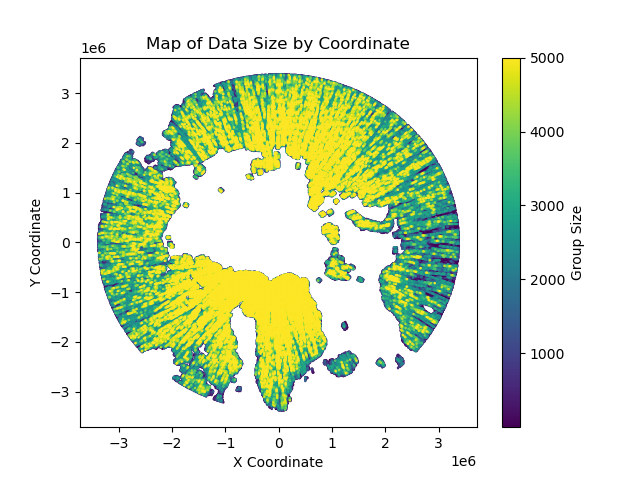

In [30]:
fig1 = plt.figure()
isort = np.argsort(sizes_arctic)
sizes_arctic = sizes_arctic.astype('f')
sizes_arctic[sizes_arctic == 0] = np.nan

plt.scatter(np.array(xs)[isort], np.array(ys)[isort], c=sizes_arctic[isort], cmap='viridis', vmax=5000, s=.5)
plt.colorbar(label='Group Size')
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Map of Data Size by Coordinate")
plt.show()